In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
import numpy as np

In [47]:
X, y = mnist["data"], mnist["target"]

In [49]:
y = y.astype(np.uint8)
y.iloc[1165]

2

In [50]:
X_train, X_test, y_train, y_test = X.iloc[:60000].to_numpy(), X.iloc[60000:].to_numpy(), y[:60000].to_numpy(), y[60000:].to_numpy()

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
sgd_clf = SGDClassifier(random_state=42)

In [10]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [11]:
some_digit = X.iloc[1165].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

In [12]:
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

In [13]:
sgd_clf.decision_function([some_digit])

array([[ -6259.34354126,  -2213.07539324,  -1063.20841931,
         -5337.3262352 ,  -3284.78552535,  -8007.67776921,
        -16400.890406  , -10507.11839795,  -3218.83212946,
        -12771.18548886]])

In [14]:
np.argmax(sgd_clf.decision_function([some_digit]))

2

In [15]:
from sklearn.multiclass import OneVsOneClassifier

In [16]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [17]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [18]:
ovo_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
len(ovo_clf.estimators_)

45

In [20]:
ovo_clf.predict([some_digit])

array([2], dtype=uint8)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest_clf = RandomForestClassifier()

In [24]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
forest_clf.predict([some_digit])

array([2], dtype=uint8)

In [26]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.84, 0.01, 0.05, 0.01, 0.03, 0.01, 0.01, 0.03]])

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [29]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.96455, 0.96295, 0.9658 ])

In [13]:
from sklearn.model_selection import cross_val_predict

In [14]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [17]:
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

In [18]:
import matplotlib.pyplot as plt

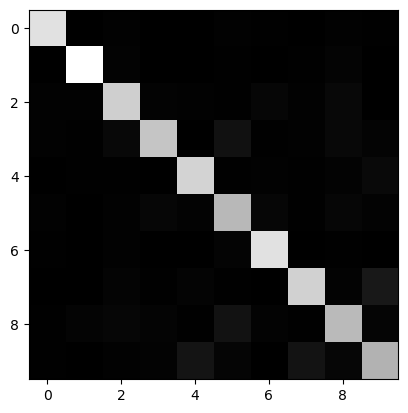

In [23]:
plt.imshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [24]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.51375992e-01, 0.00000000e+00, 1.02988350e-02, 1.68833361e-03,
        2.70133378e-03, 8.44166807e-03, 7.76633463e-03, 1.18183353e-03,
        1.11430019e-02, 5.40266757e-03],
       [4.44971818e-04, 9.48234945e-01, 1.40907743e-02, 3.11480273e-03,
        2.37318303e-03, 6.97122516e-03, 2.22485909e-03, 4.00474637e-03,
        1.61673094e-02, 2.37318303e-03],
       [1.20845921e-02, 9.39912722e-03, 8.68412219e-01, 1.49378986e-02,
        1.15810675e-02, 6.54582075e-03, 2.73581739e-02, 1.10775428e-02,
        3.55824102e-02, 3.02114804e-03],
       [9.46012070e-03, 5.21937694e-03, 3.53938999e-02, 8.05904420e-01,
        3.75142717e-03, 7.19295384e-02, 5.21937694e-03, 9.13390964e-03,
        3.52307943e-02, 1.87571359e-02],
       [1.88291681e-03, 4.45053064e-03, 7.87401575e-03, 1.02704553e-03,
        9.06881205e-01, 4.45053064e-03, 1.24957206e-02, 5.47757617e-03,
        1.48921602e-02, 4.05682985e-02],
       [1.25438111e-02, 4.24275964e-03, 1.06991330e-02, 2.76701716e-02,
   

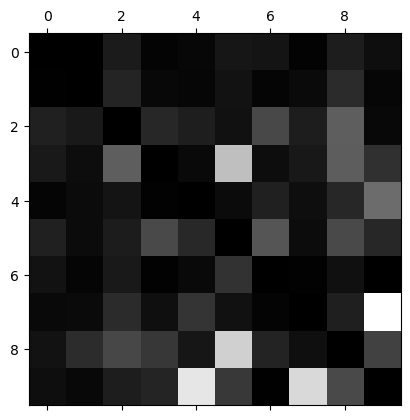

In [25]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [29]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [30]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [31]:
knn_clf = KNeighborsClassifier()

In [32]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [34]:
some_index = np.random.randint(0, len(X_test_mod))
some_index

4766

In [35]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [36]:
clean_digit.shape

(1, 784)

In [37]:
clean_digit_reshape = clean_digit.reshape(28, 28)

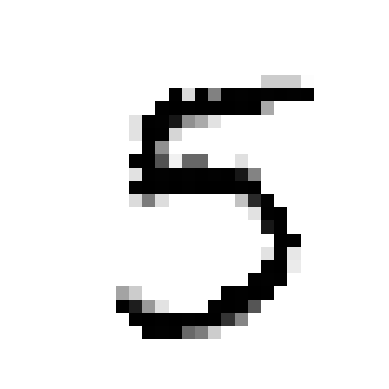

In [39]:
plt.imshow(clean_digit_reshape, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [40]:
KNeighborsClassifier?

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'n_neighbors': [2,3,4,5,6,7],
    'weights': ['uniform','distance']
}

In [43]:
GridSearchCV?

In [44]:
knn_clf = KNeighborsClassifier()

In [46]:
grid_cv = GridSearchCV(knn_clf, param_grid, scoring='accuracy', cv=3)

In [51]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
grid_cv.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [53]:
best_estimator = grid_cv.best_estimator_

In [54]:
grid_cv.best_score_

0.9703500000000002

In [55]:
y_test_pred = best_estimator.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_test_pred)

0.9714